In [1]:
#iportações

# mexer com Tempo
import datetime #importar datetime de uma vez
#from datetime import date
#from datetime import datetime
#from datetime import time


import time
#cronometrar tempo
#start_time = time.time()
#print(time.time() - start_time)
#start_time = time.time()

#pegar dados das ações no yahoo
#O limite de chamadas é de 2.000 por hora, o que equivale a aproximadamente 33 chamadas por minuto
#equivalente a 1 vistoria a cada 2 s
import yfinance as yf


#mexer com dados
import pandas as pd


#Pesquisas online




#Paralelismo



#importar/preparar IA : deixar para depois (dificil import arquivo em Jupyter especificamente): depois passar pro collab
import sys
import os

#print(os.listdir('../2IAanalise'))
import IA_do_boot


Confere


In [2]:
#Lista de empresas bancarias na B3
Lista_empresas = [
    'ABCB4', 'BBDC3', 'BBDC4', 'BPAC3', 'BPAC5', 'BPAC11',
    'BBAS3', 'BIDI11', 'BRSR6', 'BPAR3', 'BRSR3', 'BRSR5',
    'BRSR6', 'CEAB3', 'CEAB4', 'ITUB3', 'ITUB4', 'SANB3', 'SANB4'
]

In [3]:
########## Antes de começar ################

In [4]:

#Pegar os dados iniciais

# Função para coletar os dados do Yahoo Finance registro da ações em anos(intevalo dia) e em dias intervalo segundo
#yf.download(symbol, period=period, interval=interval)


#tabelas_das_acoes:
#    coluna 0  = nome ação
#    coluna 1  = anos_no_yf
#    coluna 2  = dias_no_yf
#    coluna 3  = anos_no_yf +dias_no_yf

tabelas_das_acoes = []
cont = 1
for symbol in Lista_empresas:


    # Coletando dados nos últimos anos em intervalos de dias
    yf_data_years = yf.download(symbol +".SA", period='max', interval="1d")#soma ".SA" para dar certo
    time.sleep(2)#limitação yf

    # Coletando dados nos últimos 5 dias em intervalos de 1 minuto
    yf_data_5d = yf.download(symbol +".SA", period='max', interval="1m")
    time.sleep(2)#limitação yf

#    print(yf_data_years)
#    print(yf_data_5d)
    
    # retorna True se o dataframe df não estiver vazio e False caso contrário
    if not yf_data_years.empty and not yf_data_5d.empty:
        print("Download bem "+symbol+" sucedido!")
        
        primeiro_indice = yf_data_years.index[0]
        n_anos_atras = datetime.datetime.now() - datetime.timedelta(days=5*365)

        if primeiro_indice <= n_anos_atras:
            print("O índice corresponde aos últimos 5 anos.")
                
            #junção geral
            juncao = pd.concat([yf_data_years['Close'], yf_data_5d['Adj Close']], axis=0)

            #adicionar na matraz
            tabelas_das_acoes.append([  
                str(symbol),
                yf_data_years,
                yf_data_5d,
                #junção geral
                juncao
                ])
            #print(juncao)

            #print(pd.concat([yf_data_years['Close'], yf_data_5d['Adj Close']], axis=0))
        
        

    else:
        print("ERRO ao ler =====> "+symbol)

        
print(tabelas_das_acoes)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Download bem ABCB4 sucedido!
O índice corresponde aos últimos 5 anos.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Download bem BBDC3 sucedido!
O índice corresponde aos últimos 5 anos.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Download bem BBDC4 sucedido!
O índice corresponde aos últimos 5 anos.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Download bem BPAC3 sucedido!
O índice corresponde aos últimos 5 anos.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Download bem BPAC5 sucedido!
O

Datetime
2023-04-10 10:00:00-03:00    16.440001
2023-04-10 10:01:00-03:00    16.410000
2023-04-10 10:02:00-03:00    16.400000
2023-04-10 10:03:00-03:00    16.400000
2023-04-10 10:04:00-03:00    16.420000
                               ...    
2023-04-14 16:50:00-03:00    16.719999
2023-04-14 16:51:00-03:00    16.740000
2023-04-14 16:52:00-03:00    16.730000
2023-04-14 16:53:00-03:00    16.750000
2023-04-14 16:54:00-03:00    16.780001
Name: Close, Length: 2009, dtype: float64


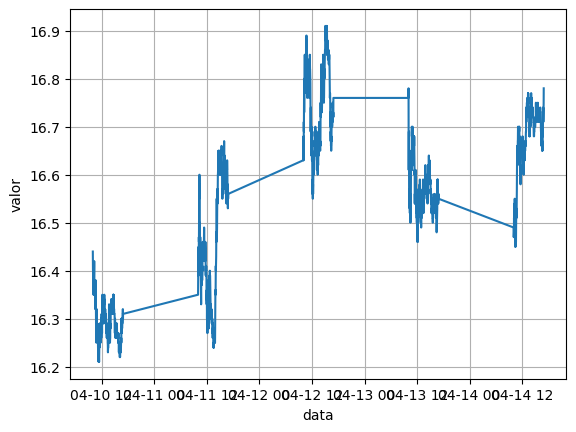

Datetime
2023-04-10 10:03:00-03:00    11.70
2023-04-10 10:04:00-03:00    11.69
2023-04-10 10:05:00-03:00    11.67
2023-04-10 10:06:00-03:00    11.68
2023-04-10 10:07:00-03:00    11.68
                             ...  
2023-04-14 16:50:00-03:00    12.36
2023-04-14 16:51:00-03:00    12.37
2023-04-14 16:52:00-03:00    12.38
2023-04-14 16:53:00-03:00    12.38
2023-04-14 16:54:00-03:00    12.38
Name: Close, Length: 2035, dtype: float64


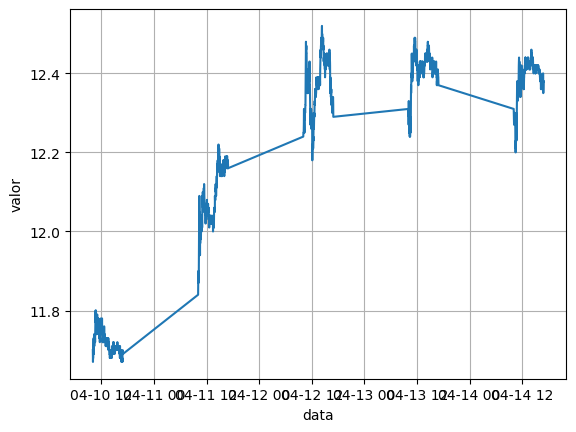

Datetime
2023-04-10 10:03:00-03:00    13.11
2023-04-10 10:04:00-03:00    13.07
2023-04-10 10:05:00-03:00    13.05
2023-04-10 10:06:00-03:00    13.07
2023-04-10 10:07:00-03:00    13.07
                             ...  
2023-04-14 16:50:00-03:00    13.71
2023-04-14 16:51:00-03:00    13.74
2023-04-14 16:52:00-03:00    13.73
2023-04-14 16:53:00-03:00    13.73
2023-04-14 16:54:00-03:00    13.73
Name: Close, Length: 2053, dtype: float64


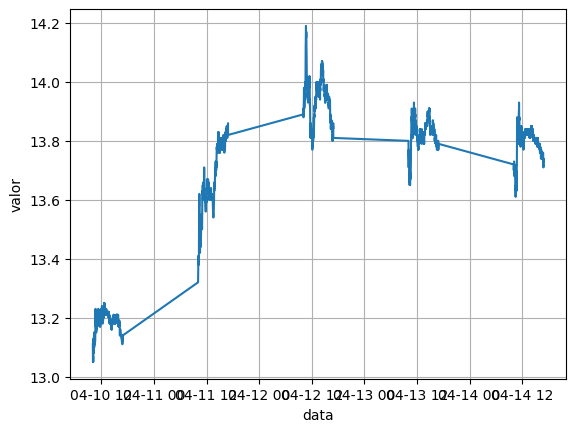

Datetime
2023-04-10 10:00:00-03:00    10.49
2023-04-10 10:15:00-03:00    10.50
2023-04-10 10:46:00-03:00    10.53
2023-04-10 10:49:00-03:00    10.79
2023-04-10 10:58:00-03:00    10.58
                             ...  
2023-04-14 13:07:00-03:00    11.76
2023-04-14 14:06:00-03:00    11.77
2023-04-14 15:43:00-03:00    11.84
2023-04-14 15:47:00-03:00    11.80
2023-04-14 15:54:00-03:00    11.79
Name: Close, Length: 119, dtype: float64


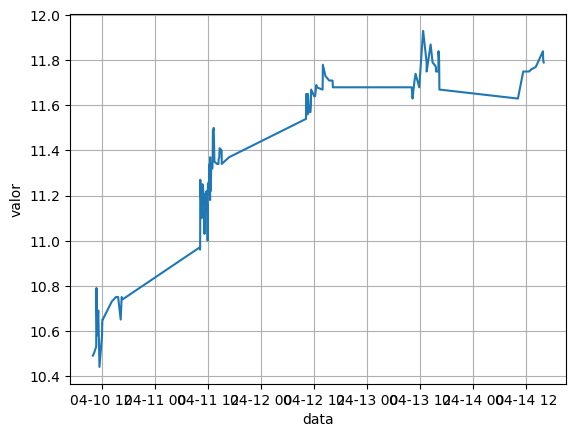

Datetime
2023-04-10 10:20:00-03:00    5.12
2023-04-10 10:21:00-03:00    5.06
2023-04-10 10:27:00-03:00    5.15
2023-04-10 10:37:00-03:00    5.15
2023-04-10 10:42:00-03:00    5.18
                             ... 
2023-04-14 13:51:00-03:00    5.62
2023-04-14 15:47:00-03:00    5.62
2023-04-14 15:54:00-03:00    5.62
2023-04-14 16:17:00-03:00    5.61
2023-04-14 16:53:00-03:00    5.68
Name: Close, Length: 106, dtype: float64


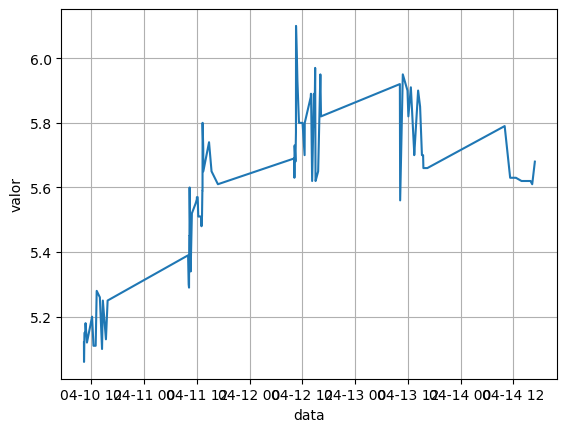

Datetime
2023-04-10 10:05:00-03:00    20.570000
2023-04-10 10:06:00-03:00    20.570000
2023-04-10 10:07:00-03:00    20.570000
2023-04-10 10:08:00-03:00    20.530001
2023-04-10 10:09:00-03:00    20.500000
                               ...    
2023-04-14 16:50:00-03:00    22.920000
2023-04-14 16:51:00-03:00    22.969999
2023-04-14 16:52:00-03:00    22.959999
2023-04-14 16:53:00-03:00    22.969999
2023-04-14 16:54:00-03:00    22.959999
Name: Close, Length: 2045, dtype: float64


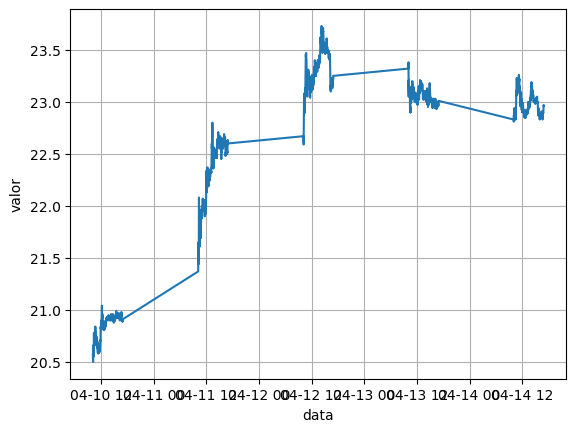

Datetime
2023-04-10 10:08:00-03:00    39.380001
2023-04-10 10:09:00-03:00    39.380001
2023-04-10 10:10:00-03:00    39.450001
2023-04-10 10:11:00-03:00    39.509998
2023-04-10 10:12:00-03:00    39.540001
                               ...    
2023-04-14 16:50:00-03:00    43.400002
2023-04-14 16:51:00-03:00    43.430000
2023-04-14 16:52:00-03:00    43.430000
2023-04-14 16:53:00-03:00    43.430000
2023-04-14 16:54:00-03:00    43.450001
Name: Close, Length: 2045, dtype: float64


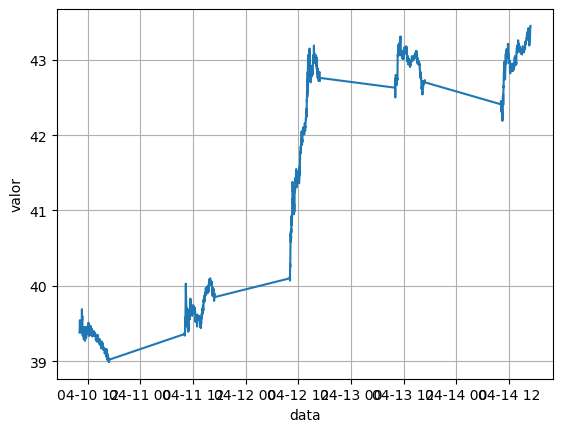

Datetime
2023-04-10 10:03:00-03:00     9.90
2023-04-10 10:04:00-03:00     9.90
2023-04-10 10:05:00-03:00     9.90
2023-04-10 10:06:00-03:00     9.89
2023-04-10 10:07:00-03:00     9.87
                             ...  
2023-04-14 16:50:00-03:00    10.41
2023-04-14 16:51:00-03:00    10.42
2023-04-14 16:52:00-03:00    10.42
2023-04-14 16:53:00-03:00    10.42
2023-04-14 16:54:00-03:00    10.42
Name: Close, Length: 2007, dtype: float64


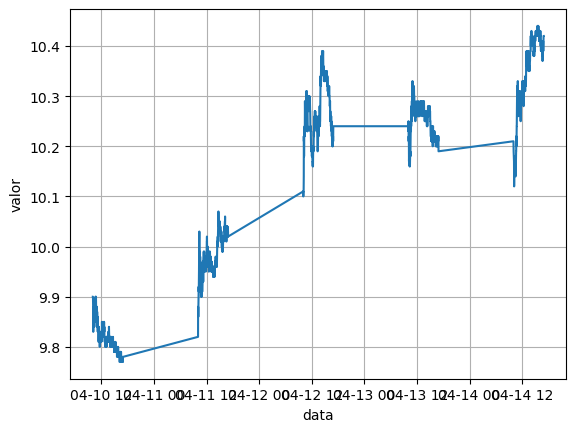

Datetime
2023-04-10 10:48:00-03:00    11.00
2023-04-10 10:54:00-03:00    11.00
2023-04-10 11:09:00-03:00    11.00
2023-04-10 11:13:00-03:00    11.00
2023-04-10 11:27:00-03:00    10.94
                             ...  
2023-04-14 13:04:00-03:00    11.41
2023-04-14 13:20:00-03:00    11.41
2023-04-14 14:20:00-03:00    11.41
2023-04-14 15:33:00-03:00    11.45
2023-04-14 16:29:00-03:00    11.27
Name: Close, Length: 84, dtype: float64


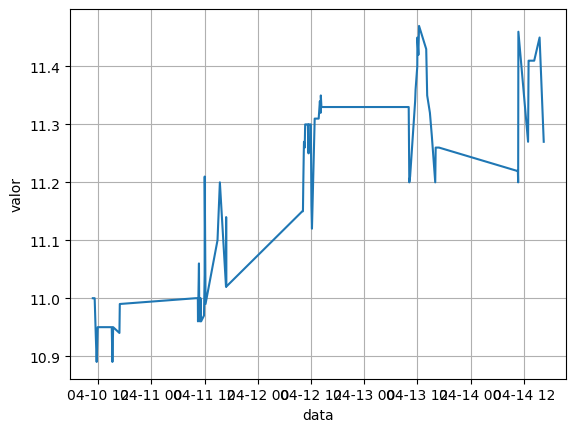

Datetime
2023-04-12 11:45:00-03:00    18.150000
2023-04-12 12:57:00-03:00    18.139999
2023-04-13 10:20:00-03:00    19.250000
Name: Close, dtype: float64


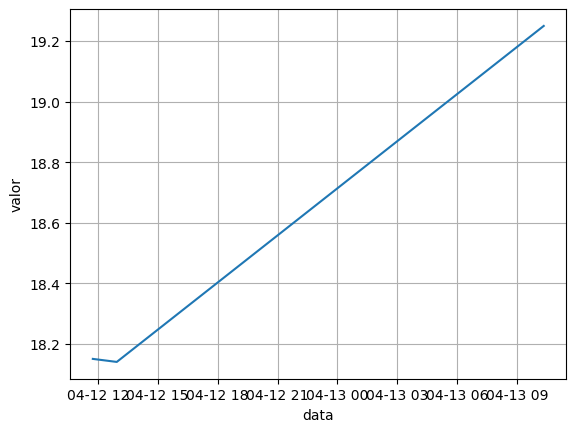

Datetime
2023-04-10 10:03:00-03:00     9.90
2023-04-10 10:04:00-03:00     9.90
2023-04-10 10:05:00-03:00     9.90
2023-04-10 10:06:00-03:00     9.89
2023-04-10 10:07:00-03:00     9.87
                             ...  
2023-04-14 16:50:00-03:00    10.41
2023-04-14 16:51:00-03:00    10.42
2023-04-14 16:52:00-03:00    10.42
2023-04-14 16:53:00-03:00    10.42
2023-04-14 16:54:00-03:00    10.42
Name: Close, Length: 2007, dtype: float64


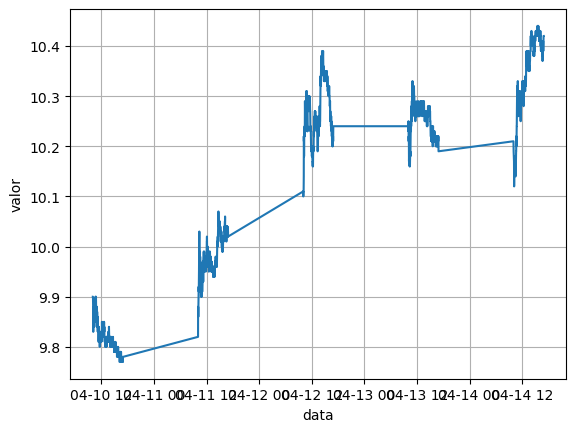

Datetime
2023-04-10 10:01:00-03:00    20.750000
2023-04-10 10:02:00-03:00    20.750000
2023-04-10 10:03:00-03:00    20.870001
2023-04-10 10:04:00-03:00    20.930000
2023-04-10 10:05:00-03:00    20.900000
                               ...    
2023-04-14 16:50:00-03:00    21.930000
2023-04-14 16:51:00-03:00    21.959999
2023-04-14 16:52:00-03:00    21.969999
2023-04-14 16:53:00-03:00    21.980000
2023-04-14 16:54:00-03:00    21.980000
Name: Close, Length: 1404, dtype: float64


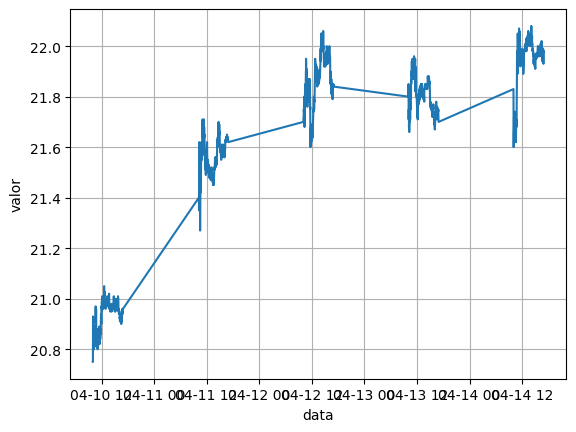

Datetime
2023-04-10 10:03:00-03:00    24.620001
2023-04-10 10:04:00-03:00    24.700001
2023-04-10 10:05:00-03:00    24.680000
2023-04-10 10:06:00-03:00    24.660000
2023-04-10 10:07:00-03:00    24.590000
                               ...    
2023-04-14 16:50:00-03:00    25.980000
2023-04-14 16:51:00-03:00    25.990000
2023-04-14 16:52:00-03:00    25.990000
2023-04-14 16:53:00-03:00    26.010000
2023-04-14 16:54:00-03:00    26.010000
Name: Close, Length: 2041, dtype: float64


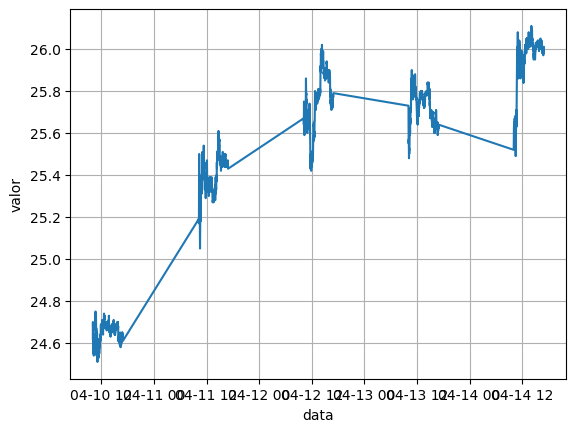

Datetime
2023-04-10 10:00:00-03:00    12.25
2023-04-10 10:01:00-03:00    12.16
2023-04-10 10:03:00-03:00    12.16
2023-04-10 10:04:00-03:00    12.14
2023-04-10 10:06:00-03:00    12.15
                             ...  
2023-04-14 16:49:00-03:00    12.91
2023-04-14 16:50:00-03:00    12.92
2023-04-14 16:51:00-03:00    12.98
2023-04-14 16:52:00-03:00    12.97
2023-04-14 16:53:00-03:00    12.96
Name: Close, Length: 1007, dtype: float64


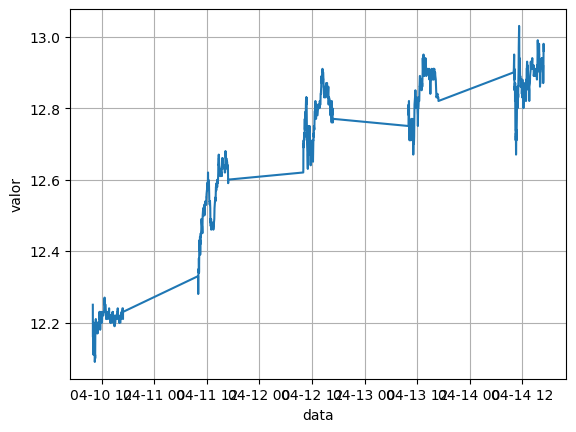

Datetime
2023-04-10 10:01:00-03:00    13.97
2023-04-10 10:03:00-03:00    13.94
2023-04-10 10:05:00-03:00    13.95
2023-04-10 10:06:00-03:00    13.91
2023-04-10 10:07:00-03:00    13.92
                             ...  
2023-04-14 16:46:00-03:00    14.75
2023-04-14 16:50:00-03:00    14.77
2023-04-14 16:51:00-03:00    14.82
2023-04-14 16:53:00-03:00    14.81
2023-04-14 16:54:00-03:00    14.81
Name: Close, Length: 1016, dtype: float64


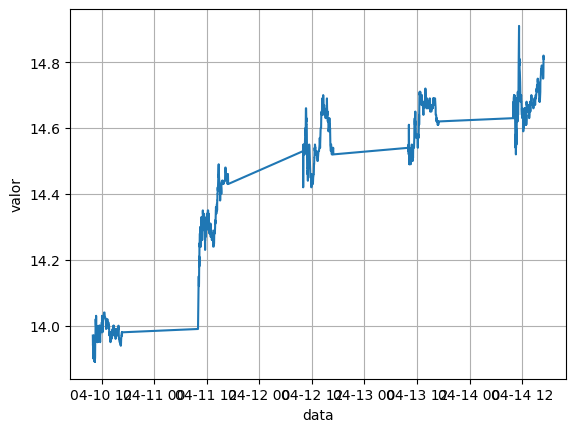

ValueError: too many values to unpack (expected 2)

In [13]:
#importar/preparar IA
#mandar os dados para IA
# usar inicializacao_Selecao
#criar tabelas
coluna_0 = [linha[0] for linha in tabelas_das_acoes]#em dias
coluna_1 = [linha[1] for linha in tabelas_das_acoes]#em dias
coluna_2 = [linha[2] for linha in tabelas_das_acoes]#em min
coluna_3 = [linha[3] for linha in tabelas_das_acoes]#tudo junto
#print(coluna_2[1])
import matplotlib.pyplot as plt

def plotar_grafico(valores, nome_eixo_x='', nome_eixo_y=''):
    #fig, axs = plt.subplots(nrows=len(valores), figsize=(20, 10*len(valores)))
    plt.plot(valores)
    plt.xlabel(nome_eixo_x)
    plt.ylabel(nome_eixo_y)
    plt.grid(True)
    plt.show()


for t in coluna_2:
    print(t['Close'])
    plotar_grafico(t['Close'], 'data', 'valor')
    
#IA_do_boot.mostrar_vetor_tabelas(coluna_2,coluna_0)

#tabelas_das_acoes_tops = IA_do_boot.init_Selecao(tabelas_das_acoes)
cont = 0
for t in coluna_2:
    #print(coluna_2[0])
    #Treino para cria modelos
    base_treino = t[0:int(len(t)*0.75)]
    base_treino = [linha['Close'] for linha in base_treino]
    quatidade_valor_futuro = int(len(t)*0.25)
    periodos_no_treino = 360 #6horas
    codigo = coluna_0[i]
    IA_do_boot.IA_youTube_Treino(base_treino, codigo, previsao_quantidade, quatidade_valor_futuro)

    cont += 1




In [ ]:
#critérios iniciais

saldo = 60
saldo_inicial = 60
lucro_atual = 0
retirada_prevista = 0

site_negociacao = ""

#B3 e a Alpha Vantage
site_info = ''

inicio = time(10, 0)  # Define o horário de início: 10:00
fim = time(17, 0)  # Define o horário de término: 17:00

#
Dias_da_Semana_Disponiveis =[0,1,2,3,4] 

  #  0: segunda-feira
  #  1: terça-feira
  #  2: quarta-feira
  #  3: quinta-feira
  #  4: sexta-feira
  #  5: sábado
  #  6: domingo


In [ ]:
# Conferencia de tempo
hoje = date.today()  # Obtém a data de hoje
dia_da_semana = hoje.weekday()  # Obtém o dia da semana correspondente (como um número inteiro)

if dia_da_semana in Dias_da_Semana_Disponiveis:
    while inicio <= datetime.now().time() <= fim:
        #print(f"O horário está dentro do período das {inicio} às {fim}")
        
        
        #threads para almentar eficiencia?
        geral()
        
    
    retirar(retirada_prevista)
    
    print(f"O horário está fora do período das {inicio} às {fim}")

else:
    print("Hoje é", hoje)
    print(hoje.strftime("%A"))  # Obtém o nome completo do dia da semana
    print("Dia da semana:", dia_da_semana)

In [ ]:
#Todo o boot em geral
def geral():pass
    # Rodar todas as empresas bancarias no site_info
    
    
    
    # Enviar dados para IA (atualização constante das tabelas)
    
    # Receber dados IA (qual ação comprar e quando vender)
    
    # Descontar tempo de Compra
        #atualizações de saldo    
        # saldo -= Preço_acao
    
    
    # Descontar tempo de Compra
    
    # Pegar novo valor da ação 
    
        #atualizações de saldo
        # saldo += novo_Preço_acao
        # fazer retirada?




In [ ]:
def retirar(retirada)
    #retirar dinheiro
    #espera tempo de retirada
    # saldo -= retirada


In [ ]:
def depositar(valor)
    
    #espera tempo 
    
    # saldo += valor


In [ ]:
def comprar(acao, valor):
    
    retirar(valor)
    #espera tempo
    
    print(f"compra de ação da {acao} por {valor} executada")
    

In [ ]:
def vender(acao, valor):
    depositar(valor)
    #espera tempo
    
    print(f"venda de ação da {acao} por {valor} executada")
    
    

In [ ]:
def pegar_base(codigo_empresa):
    #Pegar valor

In [ ]:
def pegar_novo_valor():